# Markov Chain Monte Chocolate... wait, what?

# 0. Estimate the value of $\pi$

One way to estimate the value of $\pi$ is to use the Monte Carlo method. The basic idea is to generate random points in a square and use the ratio of points inside a quarter circle to the total number of points to estimate the value of $\pi$. 
You can checkout the gist here: https://www.youtube.com/shorts/DUxvw3_cISo. 

1. Import the random module in Python.
2. Generate $n$ random pairs of $x$ and $y$ coordinates between $0$ and $1$. These coordinates will represent points in a unit square. 
3. Determine how many of the points fall inside the unit circle, which is defined as the set of points that are less than or equal to 1 unit away from the origin (0, 0).
4. Calculate an estimate for $\pi$ by multiplying the ratio of the number of points inside the circle to the total number of points by 4.



In [2]:
import random
import math
import pandas as pd

nPoints = 100
pairs = []

for i in range(nPoints):
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    pairs.append((x,y))
    
in_circle = 0
for pair in pairs:
    if math.sqrt(pair[0]**2 + pair[1]**2) <= 1:
        in_circle += 1

pi = (in_circle/nPoints)*4
pi

3.28

# 1. Chocolate problems

In the file chocolate.csv you have a dataset with ratings of 1700 chocolate bars. The rating system is as follows:

- 5= Elite (Transcending beyond the ordinary limits)
- 4= Premium (Superior flavor development, character and style)
- 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2= Disappointing (Passable but contains at least one significant flaw)
- 1= Unpleasant (mostly unpalatable)

We’re interested in the probability, that a chocolate is tasty. To check this, we will estimate the proportions of tasty chocolate bars in our dataset. We’ll assume that a chocolate bar is tasty if it’s rating is at least $2$.

Assume that the rating for each chocolate bar is idependent. A random chocolate bar is tasty with probability $θ$. It follows that the number of tasty chocolate bars follows a Binomial distribution $Bin(n,θ)$, where n is the number of inspected bars.




## 1.1 Reminder on MLE:

The MLE for $θ$ is $x/n$, where $x$ is the number of tasty chocolate bars. This is very intuitive: to estimate the proportion of good chocolate bars, we simply compute the proportion from the data.

**Your tasks**
- Estimate θ on the full dataset.
- Suppose that in our sample we have chocolate bars number 126, 1412, 989 and 623. Compute the MLE from this sample.

Overall, vast majority of chocolate bars are tasty. However, when we restricted our analysis to only four observations, we got very different results! Also, they’re not very credbile, because they’re inferred from just 4 chocolate bars. Bayesian analysis allows us to deal with this situation, by using so-called prior information.

In [3]:
choco = pd.read_csv('chocolate.csv')
N = len(choco)
X = sum(choco['Rating'] >= 2)
theta_est = X/N

# sample

choco_idx = [126, 1412, 989, 623]
choco_fract = choco.iloc[choco_idx, :]
X_fract = sum(choco_fract['Rating'] >= 2)
N_fract = len(choco_fract)
theta_fract = X_fract/len(choco_idx)

print("Estimated theta on a whole dataset:", theta_est)
print("Estimated theta on a sample:", theta_fract)

Estimated theta on a whole dataset: 0.9905292479108635
Estimated theta on a sample: 1.0


In [4]:
choco

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [5]:
choco_fract

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
126,Artisan du Chocolat,Jamaica,531,2010,72%,U.K.,3.75,Trinitario,Jamaica
1412,S.A.I.D.,Samana,615,2010,70%,Italy,3.00,,Dominican Republic
989,Machu Picchu Trading Co.,Peru,552,2010,55%,Peru,2.25,,Peru
623,Erithaj (A. Morin),Ben Tre,1205,2014,70%,France,3.25,Trinitario,Vietnam


## 1.2 Reminder on MAP

Even without any dataset, we know that more often than not chocolate is tasty. This is our prior knowledge about chocolate. Buying $4$ chocolate bars and finding out that $3$ are disgusting wouldn’t change our belief about chocolate in general - rather, we would only conclude that some of the brands are not that good. Intuitively, we know that a sample of $4$ chocolate bars is not enough to say anything about all chocolate - there is considerable amount of uncertainity in our results.

In the Bayesian approach, we treat the parameter $\theta$ as a random variable with some distribution of our choice. The randomness represents our uncertainity about the true value of $\theta$. As we will see, this has several advantages, among others:

- We can incorporate our prior knowledge,
- Small samples won’t lead us to wrong conclusions as much as before,
- We can quantify our uncertainity about the parameters.

As before, we will assume that, if we know $\theta$, the number of tasty chocolate bars follows a binomial distribution $Bin(n,\theta)$. Now, however, we will assume that $\theta$ is itself random, and follows a Beta distribution $Beta(a,b)$. The density of $\theta$, $p(\theta)$, is equal to

$$p(\theta) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a, b)}.$$

Here, $B(a,b)$ is a special function, called the Beta function, and its purpose is to make $p(\theta)$ integrate to $1$. The distribution $p(\theta)$ is called the prior distribution. The parameters $a,b$ have a straightforward interpretation: they are the numbers of tasty and untasty chocolate bars in our prior knowledge. Their sum, $n=a+b$, represents the strength of our prior belief. The fraction $$m=a/(a+b)$$ represent our prior belief about the proportion of tasty chocolate bars. The parameter n represents the strength of our prior knowledge - in other words, the number of chocolate bars we have seen so far to make our opinion and their average tastiness. In yet other words, $n$ is equal to the number of chocolate bars that we would need to inspect to change our beliefs about chocolate tastiness. **Later we will use $n$ and $m$ to re-parametrize the prior. In this parametrization, the prior is $Beta(mn,(1−m)n)$**.

The distribution of the number of tasty chocolate bars conditioned on $\theta$ is denoted $p(x|\theta)$. This is our binomial distribution. The marginal distribution of tasty chocolate bars, $p(x)$, is obtained by intergrating over $\theta$:

$$p(x) = \int_{\theta \in [0, 1]} p(x | \theta) p(\theta) d\theta.$$

This density represents the overall probability of observing $x$ tasty chocolate bars, regardless on the parameter $\theta$. It depends on the parameters $a$ and $b$.

To this point, we’ve covered the prior knowledge and it’s influence on our beliefs about the number of tasty chocolate bars. What about our goal - the estimation of $\theta$? In Bayesian approach, we’re interested in the posterior distribution of our parameters. The posterior distribution is the distribution of $\theta$ conditioned on our observations, $p(\theta|x)$. It measures how our beliefs about the values of $\theta$ are influenced by the data. To get the posterior, we use the Bayes rule (hence the name of the approach):

$$p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)} = \frac{p(x|\theta) p(\theta)}{\int_{\theta \in [0, 1]} p(x | \theta) p(\theta) d\theta}.$$

Note that $\theta$ in the numerator is not the same as $\theta$ in the denominator - the former is set by us, the latter is a variable under the integral.




**Your tasks**

Personally, I believe that 99% of chocolate bars are tasty, and you would need to show me 100 disgusting bars to change my beliefs. 
Interpret my beliefs in terms of the parameters of the prior Beta distribution. 

Check how my beliefs would change if you’d give me the bars number 126, 1412, 989 and 623 (check how many of these four are untasty and how many are tasty). What about all the 1700 bars? 
Plot the prior and the two posterior densities.

Reminder:

The posterior distribution is $Beta(a+X,b+N−X)$

In [46]:
import numpy as np
from scipy.stats import binom, gamma, beta, fit, norm
from matplotlib import pyplot as plt

In [7]:
belief = 0.99


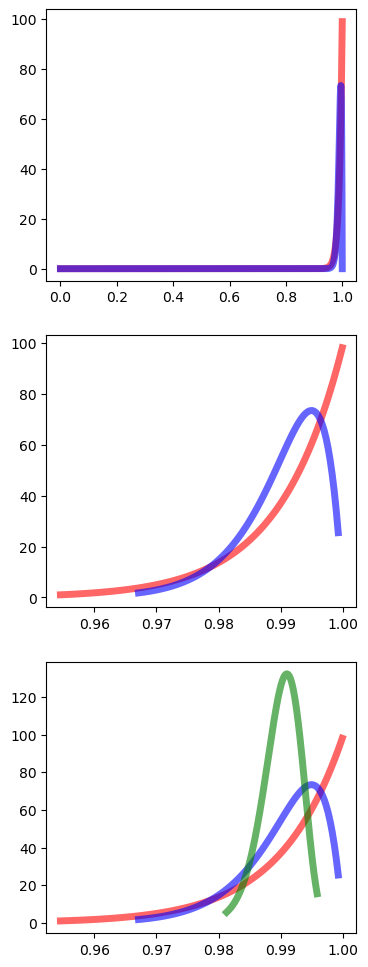

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(4,12))
a = 99
b = 1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0,1,1000)
x1 = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
x2 = np.linspace(beta.ppf(0.01, 2*a, 2*b), beta.ppf(0.99, 2*a, 2*b), 100)
x3 = np.linspace(beta.ppf(0.01, 10*a, 10*b), beta.ppf(0.99, 10*a, 10*b), 1000)
ax[0].plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
ax[0].plot(x, beta.pdf(x, 2*a, 2*b), 'b-', lw=5, alpha=0.6, label='beta pdf')
ax[1].plot(x1, beta.pdf(x1, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
ax[1].plot(x2, beta.pdf(x2, 2*a, 2*b), 'b-', lw=5, alpha=0.6, label='beta pdf')
ax[2].plot(x1, beta.pdf(x1, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
ax[2].plot(x2, beta.pdf(x2, 2*a, 2*b), 'b-', lw=5, alpha=0.6, label='beta pdf')
ax[2].plot(x3, beta.pdf(x3, 10*a, 10*b), 'g-', lw=5, alpha=0.6, label='beta pdf')
# Analyzing the influence of a and b with same proportion but different aboundance

In [9]:
def plot_beta_density(a, b):
    x = np.linspace(0,1,100) # from 0 to 1
    x2 = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
    plt.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
    plt.legend()
    plt.title("Probability density for Beta distribution with parameters a = "+ str(a) + " and b = " + str(b))
    plt.show()
    plt.plot(x2, beta.pdf(x2, a, b), 'r-', lw=5, alpha=0.6, label='beta pdf')
    plt.legend()
    plt.show()

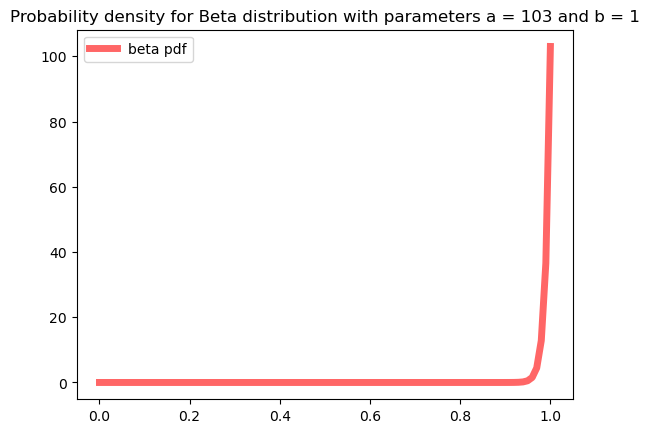

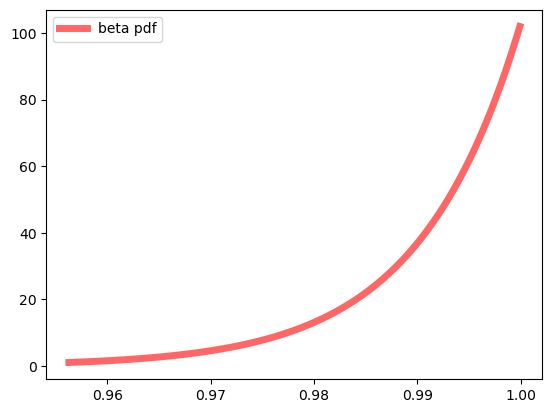

In [10]:
# Add a sample of 4 chocolate bars and plot posterior
plot_beta_density(a + X_fract, b + N_fract - X_fract)

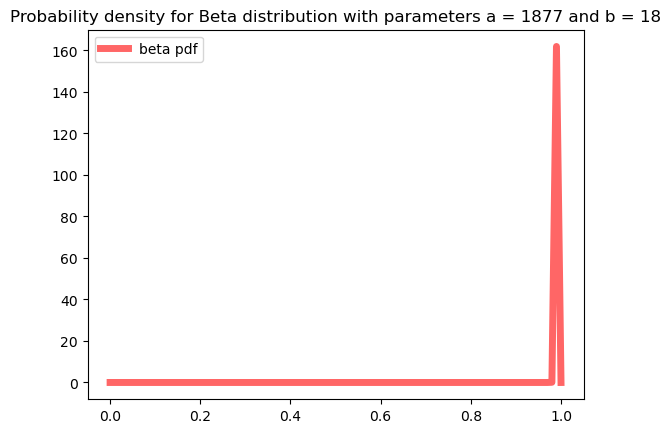

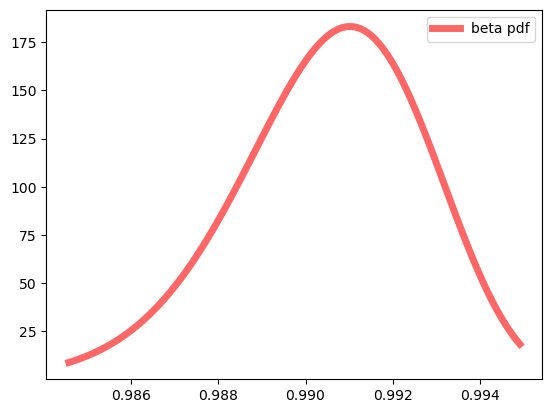

In [11]:
plot_beta_density(a+X, b+N-X)

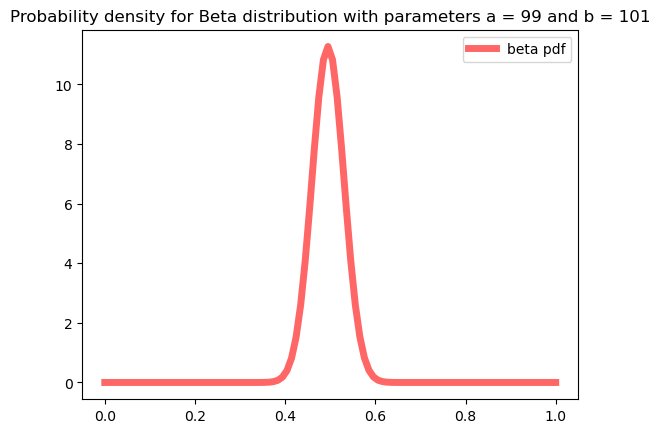

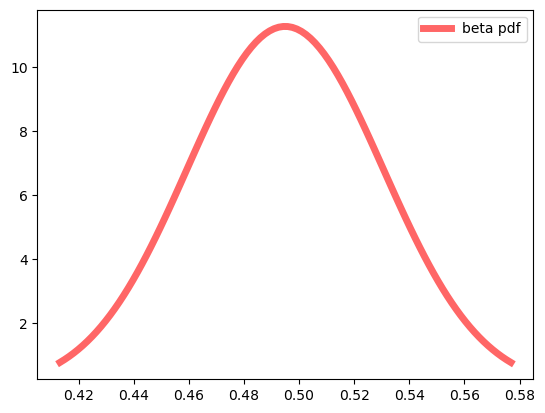

In [12]:
# Showing additional 100 disgusting bars
plot_beta_density(99, 101)

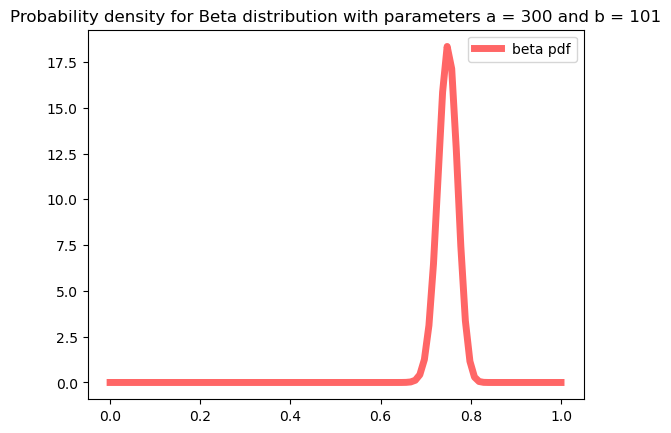

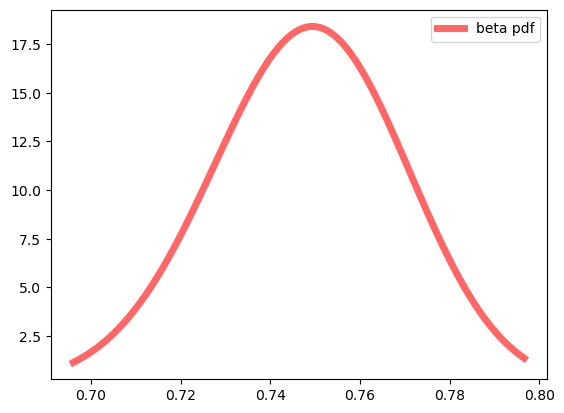

In [13]:
# More good bars
plot_beta_density(300, 101)

## 1.3 Monte Carlo approach to Chocolate

In reality, I’m not exactly sure how many bars I’d need to check to change my beliefs. However, I could say that this number is a random variable itself. This leads us to a hierarchical model, which has several “layers” of randomness. 

I’ve told you that I assume that 90% bars are tasty, and I’d need 20 bars to change my beliefs. This lead to $m=0.9$ and $n=20$. As I mentioned, in reality I’m not exactly sure if $n=20$ - maybe it’s 21 or 18? In fact, it’s reasonable to assume that m and n are random as well. This leads us to the notion of hierarchical models, which have multiple layers of randomness.

As before, let $X$ be the number of tasty chocolate bars, and assume that $X∼Bin(n,θ)$ and $θ∼Beta(nm,n(m−1))$. This time, however, we’ll assume that $n$ and $m$ are random. It’s reasonable to assume that $n$ is from Gamma distribution (which is a bit similar to Poisson distribution, but continuous), and $m$ from Beta. The full specification of our model is as follows:

\begin{align}
X & \sim Bin(n, \theta), \\
\theta & \sim Beta(nm, n(1-m)), \\
n & \sim Gamma(s, r), \\
m & \sim Beta(\mu, \nu).
\end{align}

The deterministic variables $s$, $r$, $\mu$ and $\nu$ are called hyperparameters, because they influence the parameter $\theta$. The values of the hyperparameters represent our prior knowledge. **Our goal is to infer the posterior distributions of $\theta$, $n$ and $m$.** This is, however, usually impossible. Instead, we’ll use the Monte Carlo approach to simulate the random parameters from the posterior distribution.

There are many methods to sample from the posterior distributions, the most important being the Metropolis-Hastings algorithm and the Gibbs sampler. Today, we will tackle the Metropolis-Hastings. 

In [38]:
# ploting density for gamma distribution
def plot_gamma_density(a, b):
    x = np.linspace(gamma.ppf(0.01, a, scale = 1 / b), gamma.ppf(0.99, a, scale = 1 / b), 100)
    #x_full = np.linspace(0,1000,100)
    plt.plot(x, gamma.pdf(x, a, scale = 1 / b),'b-', lw=3, label='gamma pdf')
    plt.legend()
    plt.show()

### Implementation of Monte Carlo


Again, the goal here is to to infer the posterior distributions of $\theta$, $n$ and $m$.

We want to estimate the posterior distributions of all three parameters: $\theta$, $n$ and $m$. $n$ measures the influence of $m$ on $\theta$. 
To obtain easily interpretable parameters for $Gamma(s, r)$, note that $Y \sim Gamma(s, r)$, then

\begin{align}
\mathbb{E}X &= s/r \\
Var X & = s/r^2
\end{align}

It follows that

\begin{align}
s & = \mathbb{E}^2 X / Var X \\
r & = \mathbb{E} X / Var X.
\end{align}

Now, recall that n represents the strength of our prior knowledge (the number of chocolate bars we’d need to check to alter our beliefs). So, if we believe that our beliefs are worth about 20±10 chocolate bars, it’s reasonable to parametrize the prior by specifying

\begin{align}
s & = 10^2 / 10^2 = 1 \\
r & = 10 / 10^2 = 0.1.
\end{align}


Remember about the restrictions for parameters (e.g. $n≥0$)

Hint: you can use $torch.distributions$ here if you want, but it might be more convenient to use $scipy.stats$.

In [59]:
# Set the hyperparameters
prior_n = 20
prior_m = 0.9
nu = 2
mu = 4
s = 1
r = 0.1

# Set the observed data
N = len(choco) # number of tested chocolate bars
X = sum(choco['Rating'] >= 2) # number of tasty bars (maybe you can tweak it and set your expectations higher?)

print(X/N)

0.9905292479108635


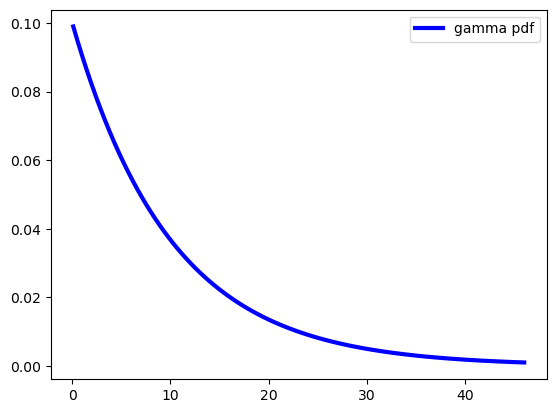

In [40]:
plot_gamma_density(s, r)

In [72]:
#### Define the posterior distribution as a function of the parameters
def posterior(n, m, theta):
  # Compute the likelihood of the observed data
  likelihood = binom(N, theta).pmf(X) # n, czy 100+n?, m czy (m*100)/(100+n)
  
  # Compute the prior distribution of the parameters
  prior_n = gamma(s, r).pdf(n)
  prior_m = beta(mu, nu).pdf(m)
  prior_theta = beta(n * m, n * (1 - m)).pdf(theta)
  
  # Return the product of the likelihood and the priors as the unnormalized posterior
  return likelihood * prior_n * prior_m * prior_theta


In [73]:
print(gamma(s, r).pdf(2))

0.14956861922263506


In [79]:
# Initialize the MCMC chain with a random state
np.random.seed(1234)

n = prior_n
print(n)
m = prior_m
theta = np.random.beta(prior_n * prior_m, prior_n * (1 - prior_m))

# Set the number of iterations for the MCMC algorithm
num_iterations = 10000 

# Define empty lists to store the samples from the posterior
n_samples = []
m_samples = []
theta_samples = []

# Run the MCMC algorithm
for i in range(num_iterations):
    # Propose new values for the parameters
    # Hint: there are many ways to do this 
    # TODO
    new_n = max(0.0000001, norm(n, 0.1).rvs()) # powinno zależeć od poprzedniego n
    print("N", new_n)
    new_m = max(0.0000001, min(0.99999999, norm(m, 0.01).rvs())) # tak samo
    print("M", new_m)
    new_theta = beta(new_n * new_m, new_n * (1 - new_m)).rvs()  #??
    print("Theta", new_theta)
    # Compute the unnormalized posterior probability at the current state and the proposed state
    # TODO
    current = posterior(n, m, theta)
    proposed = posterior(new_n, new_m, new_theta)
    # Compute the acceptance probability
    # TODO
    acc = proposed/current
    # Sample a uniform random variable
    # TODO
    u = random.uniform(0, 1)
    # If the random variable is less than the acceptance probability, move to the proposed state
    # TODO
    if u <= acc:
        n = new_n
        m = new_m
        theta = new_theta
    # Save the current state in the samples
    # TODO
    n_samples.append(n)
    m_samples.append(m)
    theta_samples.append(theta)

# Compute the posterior means of the samples
n_mean = np.mean(n_samples)
m_mean = np.mean(m_samples)
theta_mean = np.mean(theta_samples)

20
N 19.927941126663498
M 0.9088716294030774
Theta 0.9628801450596803
N 20.001569637211443
M 0.877573150458146
Theta 0.8516165983271563
N 19.96659226341919
M 0.9000211836468349
Theta 0.9038068342660628
N 19.97973536753708
M 0.8934403065586107
Theta 0.8739911637537949
N 20.067555408512238
M 0.8818297277340981
Theta 0.8077132362466549
N 20.104757857289272
M 0.9104593825562767
Theta 0.9429621563038408
N 20.012471295376823
M 0.8967720519439171
Theta 0.7489293241493877
N 20.003614193668408
M 0.8792502239930997
Theta 0.9463702561176559
N 20.075541398239814
M 0.9021526858096944
Theta 0.9820712360672978
N 20.02071715332113
M 0.9007064907260006
Theta 0.9227780422529445
N 20.13211522884607
M 0.91760927385595
Theta 0.9198445785938903
N 20.178921471495364
M 0.8781481494715715
Theta 0.9695679854846979
N 19.996997877063492
M 0.9067732831813149
Theta 0.9020251897787629
N 20.098237652426903
M 0.8906260947171849
Theta 0.913814433424384
N 20.207651959786833
M 0.9036789913317398
Theta 0.9430066691924692


N 19.54307241533425
M 0.934254724087776
Theta 0.9648360897884314
N 19.678760194924262
M 0.9217148596321608
Theta 0.9444513177563187
N 19.569273194939836
M 0.9382952354620836
Theta 0.9516398893274208
N 19.764200049160944
M 0.9309862083385186
Theta 0.8005828371123279
N 19.558958238791003
M 0.9273199741780263
Theta 0.9864235700287922
N 19.646226852819094
M 0.9240883989020584
Theta 0.944285353255761
N 19.65503417783633
M 0.9357097238665258
Theta 0.6928245370593508
N 19.76635039817895
M 0.9465927916429965
Theta 0.9677883431482865
N 19.60170939916517
M 0.9303049855608105
Theta 0.9671341928846103
N 19.88927252337113
M 0.9339102994657654
Theta 0.9567036341934138
N 19.677072261214445
M 0.9290669269402769
Theta 0.908644892237943
N 19.592948593012693
M 0.9338141020835666
Theta 0.8979719035005723
N 19.579679306087677
M 0.9418907252819206
Theta 0.9815998253019694
N 19.7386756077672
M 0.9258323739351051
Theta 0.9048854592979813
N 19.875362332860163
M 0.9344861245387354
Theta 0.9828024239143379
N 19.

C:\Users\roksa\AppData\Local\Temp\ipykernel_5728\3206676334.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return likelihood * prior_n * prior_m * prior_theta


N 19.475767390067688
M 0.960918610728088
Theta 0.8533047204632019
N 19.540029406676805
M 0.9563340271138765
Theta 0.8491123202229486
N 19.49813239761247
M 0.9539619027385342
Theta 0.964688789034997
N 19.43017502740788
M 0.9484556203635476
Theta 0.9913754132169299
N 19.36778342982803
M 0.9241649154409255
Theta 0.9256802042720176
N 19.359931867180983
M 0.9557724532918943
Theta 0.9339557104998762
N 19.29567336119467
M 0.9398495382466442
Theta 0.9255330954487129
N 19.550153618081808
M 0.9442962772828122
Theta 0.9426558304874055
N 19.545646721221736
M 0.9551984409718669
Theta 0.9281670193501123
N 19.499995048109803
M 0.9519045339957914
Theta 0.9899607924810729
N 19.62103493014355
M 0.9692087847871758
Theta 0.983450541730159
N 19.544255242409104
M 0.9736807253801515
Theta 0.999502675761053
N 19.38134967956195
M 0.9363512166307028
Theta 0.8123034496595343
N 19.495416289888528
M 0.9549020380306568
Theta 0.9827326628437678
N 19.498701425094534
M 0.9615737409795229
Theta 0.9664070415956197
N 19.

N 19.62865630473713
M 0.9635048510322256
Theta 0.9637402004036586
N 19.720247309232278
M 0.9536646058622988
Theta 0.9830633131804142
N 19.527277553359372
M 0.9313914957291476
Theta 0.9596179882060207
N 19.8092138051213
M 0.9565803351160465
Theta 0.9979735221657554
N 19.80230083203437
M 0.9508144210289885
Theta 0.9905454642313702
N 19.91785565036473
M 0.9534993113997048
Theta 0.9689619950770367
N 19.67018044783894
M 0.9570347006626571
Theta 0.9635857760475665
N 19.85089694411757
M 0.9342642906832958
Theta 0.9944394673397547
N 19.89250935064945
M 0.9548544786250114
Theta 0.9698684908224429
N 19.728104642690543
M 0.9135620720799742
Theta 0.9680706455692107
N 19.973132072250845
M 0.9614083352385336
Theta 0.9861049964057651
N 20.135156492912184
M 0.9635563436224039
Theta 0.9848314603134231
N 19.949160561574583
M 0.9587409950923174
Theta 0.9336307998895125
N 19.990598662712852
M 0.9492870268635883
Theta 0.9789331716532991
N 20.037939603824316
M 0.9747866399831313
Theta 0.9990170014815246
N 1

N 19.47328446009545
M 0.9471741681202772
Theta 0.8560399360983861
N 19.48418062817576
M 0.9663775262080938
Theta 0.999993698836376
N 19.63368563392138
M 0.9646829235679524
Theta 0.9837214726990055
N 19.64398197789219
M 0.9744140696234559
Theta 0.9994667339646858
N 19.65764213876231
M 0.9684937807864877
Theta 0.9822477796516869
N 19.400746025154817
M 0.9633148279434748
Theta 0.9901869943218365
N 19.334193375570532
M 0.9479378944850663
Theta 0.8930992791644559
N 19.51586684713132
M 0.968554295962354
Theta 0.9995850196800057
N 19.569456018848374
M 0.9576743049252207
Theta 0.9773366108154666
N 19.43383751188847
M 0.9750366137153
Theta 0.9888426140525037
N 19.214249704927663
M 0.9793108466770502
Theta 0.999118024228025
N 19.369151442387874
M 0.9654224885737822
Theta 0.9634859800605023
N 19.52738345328477
M 0.9759120278715475
Theta 0.9989039290621478
N 19.442367584207926
M 0.9755352425562674
Theta 0.9973909919002385
N 19.369268499051817
M 0.9646140488746782
Theta 0.9855448199983506
N 19.5358

N 19.99967594471837
M 0.945737191451016
Theta 0.9306991885767564
N 20.06364185621691
M 0.9372038533736876
Theta 0.9548834738710769
N 19.86307878537134
M 0.9336055740669166
Theta 0.861978881827475
N 20.044215043634054
M 0.9436375194626668
Theta 0.9830256409343465
N 20.065353436870566
M 0.9366568026069148
Theta 0.9889360697833447
N 20.198181924621842
M 0.932922583220125
Theta 0.9631345829555857
N 20.282115183894536
M 0.9328682316017874
Theta 0.8654794616856046
N 20.091255251144357
M 0.9310588901036541
Theta 0.8586320335658195
N 20.091501093995305
M 0.9143211529863403
Theta 0.8808299877910726
N 20.092786886331975
M 0.9293286447230336
Theta 0.9883272664573913
N 19.876497931655226
M 0.9451680123211003
Theta 0.9964774084370294
N 20.09042993871886
M 0.9329722670371202
Theta 0.8459732160355854
N 20.07930709348569
M 0.9447297336862103
Theta 0.9766034546690526
N 20.080716582923113
M 0.9368724864963576
Theta 0.9239065152299553
N 19.95792310950356
M 0.9246759698320287
Theta 0.9712225378423629
N 20

N 19.39395668127774
M 0.9591601768170244
Theta 0.9752775010886096
N 19.35334081451176
M 0.9455471133314641
Theta 0.9898667567344044
N 19.455243145163877
M 0.9389387434063201
Theta 0.9822186768985457
N 19.520035792468512
M 0.9540422732702718
Theta 0.9756823614036321
N 19.216048456833473
M 0.9410005004694609
Theta 0.8719517185636418
N 19.184039846250467
M 0.9460312763556615
Theta 0.967246884020428
N 19.189408245563055
M 0.9445893774740685
Theta 0.9731766021259314
N 19.3237659032222
M 0.9618295473675565
Theta 0.9624410486651586
N 19.32315451941014
M 0.9320444161924606
Theta 0.9971933834377732
N 19.338654968075883
M 0.936776055978221
Theta 0.8871979366359987
N 19.13008268872104
M 0.9385863136444244
Theta 0.9397927455043513
N 19.2800909449062
M 0.9469572581507303
Theta 0.9804188075615773
N 19.372603098073476
M 0.9323681801011532
Theta 0.9093202096514675
N 19.412743162459158
M 0.9467774453327165
Theta 0.9365394144681668
N 19.460166602306202
M 0.949458641224211
Theta 0.8417547296942902
N 19.4

N 19.400291591069248
M 0.9182044124090446
Theta 0.8985677586595268
N 19.30682880416848
M 0.9239342618922998
Theta 0.9360163240475009
N 19.208779480670632
M 0.9257652575805283
Theta 0.9340632471550608
N 19.352384558224664
M 0.9278785441531905
Theta 0.9548522133161468
N 19.22639757037423
M 0.9301816001724252
Theta 0.9556908840608382
N 19.29366241140441
M 0.9412042491607447
Theta 0.8478011587242712
N 19.365755219014694
M 0.9260552146849237
Theta 0.8331634895295084
N 19.402296616874658
M 0.918200978940412
Theta 0.9184033297946618
N 19.40272271834798
M 0.9338850796221113
Theta 0.9331242010602524
N 19.43922029281822
M 0.9419983462507954
Theta 0.9607551884059314
N 19.389813692162953
M 0.9400013829746485
Theta 0.9307760709623599
N 19.43691344921347
M 0.9338732852414761
Theta 0.9391764116012351
N 19.37076430574781
M 0.9198549172455218
Theta 0.9765131889860847
N 19.32549799030581
M 0.9157044522899201
Theta 0.9640408573152275
N 19.367162518306976
M 0.9343785501139228
Theta 0.9250033192191154
N 19

N 19.357581495275845
M 0.9932538524074206
Theta 0.9978810073116045
N 19.254447765287626
M 0.9769886162858177
Theta 0.9998953363637523
N 19.11346889364092
M 0.9834508471081217
Theta 0.9815800591240288
N 19.467097971737758
M 0.9941337547521648
Theta 0.9999577944343775
N 19.44686967200548
M 0.9592577230992263
Theta 0.973041456225481
N 19.4147724890654
M 0.9711502100282899
Theta 0.984012538232063
N 19.332908703689263
M 0.9727909069257317
Theta 0.986232604156944
N 19.546682348278104
M 0.9569034387148909
Theta 0.9861028186714567
N 19.578541220418078
M 0.9700888374668709
Theta 0.9631612817321714
N 19.552265405647614
M 0.9595354180733376
Theta 0.9664898066105176
N 19.388488403938194
M 0.9585125199842002
Theta 0.8919339578590054
N 19.622253550291973
M 0.9628860486442171
Theta 0.9952760581450029
N 19.5208336451448
M 0.960936615987014
Theta 0.9560218543891105
N 19.635766637076262
M 0.9539085307548769
Theta 0.9697758549019918
N 19.59380503307971
M 0.9542663427220257
Theta 0.9986068238285388
N 19.5

N 19.693661737058477
M 0.9844318523718478
Theta 0.9897049888795412
N 19.8423933011066
M 0.9815598161943291
Theta 0.9885844957464409
N 19.93500342976988
M 0.971587973178636
Theta 0.9977963196552222
N 19.957787187610982
M 0.984251013644287
Theta 0.9937783399012129
N 19.976864246360975
M 0.9741146934842402
Theta 0.9997249794249217
N 19.719815985695472
M 0.9824325902245962
Theta 0.9127642803151882
N 19.697895501837095
M 0.9841788805401039
Theta 0.9975553983726038
N 19.84060340747431
M 0.9876610063611737
Theta 0.9999861695316098
N 19.82624894082997
M 0.9778140873322159
Theta 0.991228422494918
N 19.749777478938206
M 0.9746494641787056
Theta 0.99331285124263
N 19.759018403545916
M 0.9733658388852471
Theta 0.9293170829796894
N 19.806351503977613
M 0.9830255247767974
Theta 0.9992126765450495
N 19.696309852988332
M 0.9692148943076765
Theta 0.9896841922442806
N 19.420679291028602
M 0.9714386756210794
Theta 0.9626714843852227
N 19.685525090576565
M 0.9547206209036031
Theta 0.962055850622193
N 19.5

N 19.654868414590815
M 0.9868102895485471
Theta 0.9998895212128329
N 19.482387599718006
M 0.979648882273581
Theta 0.9955896810798256
N 19.49505576806135
M 0.9813292185661519
Theta 0.9701321311039559
N 19.713803354853795
M 0.9886304739236605
Theta 0.9890961802977423
N 19.701118831241157
M 0.9962142077457637
Theta 0.9999578641612429
N 19.400388286359206
M 0.979047735477952
Theta 0.9999749658928296
N 19.58066152260504
M 0.969477675780711
Theta 0.9966014367624975
N 19.76865671115169
M 0.9651589296378829
Theta 0.9999041097695598
N 19.286254673881313
M 0.9691802693909569
Theta 0.989782941367718
N 19.310455701521544
M 0.9695202323111396
Theta 0.9993960013760097
N 19.2459570827606
M 0.9648246402617023
Theta 0.9947423358604482
N 19.21717802530629
M 0.9739725407099534
Theta 0.9587881135624045
N 19.33281334880599
M 0.9709098688836806
Theta 0.940359246123127
N 19.394345371540318
M 0.9792741518081416
Theta 0.9746425609125343
N 19.462994196024535
M 0.9673665351421475
Theta 0.953169583524378
N 19.209

N 19.652644050195324
M 0.9661861373728489
Theta 0.999037836763966
N 19.62201896708501
M 0.9765139052001349
Theta 0.9999134743635286
N 19.664354633928827
M 0.9711203404277992
Theta 0.9896022074253381
N 19.649375351718863
M 0.9749746106067491
Theta 0.9421408962397375
N 19.764453290124344
M 0.9681581695416152
Theta 0.9176371150840499
N 19.54125080902191
M 0.9657887413951689
Theta 0.9754246383917645
N 19.61258496052127
M 0.970773357185958
Theta 0.9935659201683451
N 19.69463860294312
M 0.9624898529470993
Theta 0.9940832496675697
N 19.592766198458598
M 0.9589996887324992
Theta 0.9530723488401172
N 19.596930670038894
M 0.9573909600764732
Theta 0.9525019954542656
N 19.61015854305434
M 0.9582083574023385
Theta 0.9655515321712254
N 19.605407689722202
M 0.9571477023147833
Theta 0.9936182614151211
N 19.648276443022926
M 0.9639418050540455
Theta 0.863187153613768
N 19.57385547698537
M 0.960719948514871
Theta 0.9607431185101357
N 19.544657555866905
M 0.9679176361153152
Theta 0.9437927780472193
N 19.

N 19.844901397159102
M 0.9582394367034411
Theta 0.8791144905088529
N 19.942723812492297
M 0.9481918115271495
Theta 0.8480157981972823
N 19.789579752557696
M 0.958985226382913
Theta 0.9242948644457778
N 19.864084337906895
M 0.9586924793007461
Theta 0.995730542560422
N 19.863598469569943
M 0.9638416884825802
Theta 0.9524690578384939
N 19.843559951844906
M 0.9608762386588846
Theta 0.9806856862137705
N 19.75146113611564
M 0.9841755112788181
Theta 0.9779618788245525
N 19.76035842286324
M 0.9456071695873228
Theta 0.9213324816328723
N 19.857338485492235
M 0.9414479185358174
Theta 0.9857524192332766
N 19.83963881189315
M 0.9560183665815456
Theta 0.828852248047178
N 19.691325752710792
M 0.9620538779708496
Theta 0.9372539750583944
N 19.94384303850861
M 0.9545196084006767
Theta 0.9927484095083439
N 19.944435393088483
M 0.9782199701608673
Theta 0.9765842259999812
N 19.87020487076252
M 0.9415652326901166
Theta 0.9329165859165403
N 19.875664538566106
M 0.956206454082939
Theta 0.9459880150296712
N 20

N 19.58313796353896
M 0.9707424302777489
Theta 0.9952164859772404
N 19.70868562357159
M 0.9786191760946628
Theta 0.9998501412699783
N 19.51118258493572
M 0.9651658184921333
Theta 0.9744888791951041
N 19.52718104341139
M 0.9727029825329159
Theta 0.9996920948521378
N 19.729502161112514
M 0.9826544908801613
Theta 0.9998290181559841
N 19.58468060494179
M 0.9612918580652222
Theta 0.9743728000066556
N 19.462824622357026
M 0.9810278019310321
Theta 0.9950768019553855
N 19.432223522924545
M 0.9741534047334309
Theta 0.9727836475123443
N 19.44776920549524
M 0.985826245975116
Theta 0.9996559532602085
N 19.242786695246394
M 0.9726667515952859
Theta 0.9618066993261292
N 19.414919874398674
M 0.9614523713693197
Theta 0.9838679498153948
N 19.546464606616826
M 0.9689910798696617
Theta 0.9867889607724989
N 19.560867295640172
M 0.9715409151633528
Theta 0.9997056127772763
N 19.379384051800955
M 0.9692370357276545
Theta 0.9903707937083707
N 19.3658809594599
M 0.962707628147858
Theta 0.8509358097384858
N 19.

N 19.861900366600004
M 0.9875320537926002
Theta 0.982807286711402
N 19.712995025982945
M 0.9771947836940005
Theta 0.9993856614354254
N 19.705538634210743
M 0.9863841506166261
Theta 0.9927489916314735
N 19.6716389270755
M 0.9778353835179815
Theta 0.999850134617531
N 19.78961706310691
M 0.9872443391711997
Theta 0.9998116156209593
N 19.699517046427722
M 0.9951204699663988
Theta 0.999836894735802
N 19.66525085360101
M 0.9829548198101519
Theta 0.9460375108800959
N 19.758279289328975
M 0.9796459654830197
Theta 0.9910197550522771
N 19.93830254860365
M 0.9865170757415864
Theta 0.9880457043718983
N 19.78622682207465
M 0.9732433737976847
Theta 0.9982043203655755
N 19.678585380866576
M 0.9705882283604013
Theta 0.9231083254638425
N 19.68987083558197
M 0.9898873655994231
Theta 0.9999583502542487
N 19.712918788791292
M 0.9725317600989952
Theta 0.9999571415889885
N 19.771461958607848
M 0.9724332874807369
Theta 0.9986219022890063
N 19.814178006311593
M 0.9902670755024049
Theta 0.999999992217259
N 19.9

N 19.636926594356687
M 0.9657436452945168
Theta 0.9729532618158199
N 19.304670688582334
M 0.9811700972651998
Theta 0.9982373118320264
N 19.401513510160303
M 0.971930376427841
Theta 0.9999227833179971
N 19.351781924381648
M 0.9544617838389103
Theta 0.9003987584435189
N 19.431270049819673
M 0.9621622824771315
Theta 0.920821771760326
N 19.307226525940564
M 0.9695172188880068
Theta 0.9626533211329122
N 19.55522517493343
M 0.9743927519694932
Theta 0.9967988057857629
N 19.262478589710454
M 0.9619927902282299
Theta 0.9211129095540107
N 19.21882658771251
M 0.9549619776470212
Theta 0.9627001554296333
N 19.559905440554886
M 0.9690081835074599
Theta 0.988200497389071
N 19.464802995742435
M 0.967282768921557
Theta 0.9943146081730375
N 19.512401523543815
M 0.9545462091586037
Theta 0.9633533436925877
N 19.510813170413456
M 0.9621905065329814
Theta 0.9252818521557191
N 19.58607132874008
M 0.967418147225114
Theta 0.9985400093590653
N 19.53742925238478
M 0.9762272566079067
Theta 0.9958735876817011
N 19

N 19.25546821947538
M 0.9954875432437787
Theta 0.9997894226014966
N 19.061640507296357
M 0.9673397989437135
Theta 0.8744920149518439
N 19.27712358721282
M 0.9718154267366141
Theta 0.7907547646072051
N 19.149986516163153
M 0.99999999
Theta 1.0
N 19.148875386593893
M 0.9794469484907352
Theta 0.9832609353339483
N 19.084734148028097
M 0.9923650303289284
Theta 0.9952684982904617
N 19.256531198372702
M 0.9765032334894401
Theta 0.9982519854565184
N 19.210774303308312
M 0.9807024381527395
Theta 0.9980529625316812
N 19.18374473717989
M 0.9927120965280836
Theta 0.9902753507431757
N 19.044594455974366
M 0.9859202695408601
Theta 0.9776132528333024
N 19.203153194911287
M 0.994577901500511
Theta 0.99950352312691
N 19.02370431268311
M 0.995502862674571
Theta 0.9999999999973083
N 19.184533196817085
M 0.9968428610726284
Theta 0.9999999799781781
N 19.025543013811195
M 0.9849942443650652
Theta 0.9993189640810966
N 19.21613066090452
M 0.9878175406457191
Theta 0.999931961510601
N 18.939391365583088
M 0.973

N 18.791170613958954
M 0.9713443903726828
Theta 0.9617637005283293
N 18.61789869986471
M 0.9777727355182164
Theta 0.9776112031333195
N 18.784926682886784
M 0.9688375832871756
Theta 0.9842645222142726
N 18.648663523652004
M 0.9609834671150304
Theta 0.9294909915909771
N 18.828598309124846
M 0.995313895017388
Theta 1.0
N 18.739996365114663
M 0.9648916336766786
Theta 0.9644300604532992
N 18.82261016739278
M 0.9558248021488195
Theta 0.9239634229730829
N 18.6994231521228
M 0.9679303481843795
Theta 0.9336023105291148
N 18.800658636896827
M 0.9699278377050549
Theta 0.9762773317856457
N 18.890965497003503
M 0.979461223929663
Theta 0.999855766291841
N 18.78879988481769
M 0.954301953616959
Theta 0.9545616555105406
N 18.794690788287525
M 0.9798937846613444
Theta 0.9999999995162018
N 18.776924384669062
M 0.9750092983446402
Theta 0.944230455372167
N 18.92330447933959
M 0.9701395574123186
Theta 0.9999635068032522
N 18.805731314765506
M 0.9724936486159491
Theta 0.9864844869421727
N 18.662136183049444


N 18.40977650545761
M 0.951806698326556
Theta 0.8759339786732001
N 18.31035259650777
M 0.9701936035186179
Theta 0.9850903092529791
N 18.45952576342218
M 0.9713461219189221
Theta 0.9905471190010475
N 18.336403088932634
M 0.9785772704793507
Theta 0.998641381227182
N 18.435673284194777
M 0.9853540073064829
Theta 0.9857979642329443
N 18.39945583494023
M 0.9817164827563903
Theta 0.966687560052637
N 18.296149601497227
M 0.9687703235671065
Theta 0.9867345413766226
N 18.115358987743967
M 0.9750134065644754
Theta 0.9971308064459671
N 18.183261672202093
M 0.9792961098324136
Theta 0.9648033194648762
N 18.224623019475555
M 0.9559011203737482
Theta 0.9306269264377206
N 18.30712077040909
M 0.9761499714213512
Theta 0.983878141815419
N 18.173878670018922
M 0.9784623242827363
Theta 0.9725496540314824
N 18.496280594309614
M 0.9615365403445741
Theta 0.9991411984667043
N 18.306649934169908
M 0.960180061405722
Theta 0.9606708811758145
N 18.261788800005057
M 0.986062642205484
Theta 0.9880704046176706
N 18.2

N 18.482020913065586
M 0.9492332935568587
Theta 0.874756179393523
N 18.643985194835906
M 0.9476461227950487
Theta 0.9462536223383818
N 18.72228841736939
M 0.9654455942970214
Theta 0.9071072585693591
N 18.650167933776277
M 0.9679524068042372
Theta 0.9918188332277884
N 18.758264165712497
M 0.967324922380158
Theta 0.9097777414449583
N 18.61459588376264
M 0.974540732531023
Theta 0.926627212491375
N 18.7130738671608
M 0.9880039779801237
Theta 0.9678999117826176
N 18.546930537138632
M 0.9732300264605808
Theta 0.9741145242636668
N 18.45087582260765
M 0.9566742710697235
Theta 0.928682381574856
N 18.86176952727876
M 0.9773323774046537
Theta 0.999999088854334
N 18.62705145284039
M 0.972300556278793
Theta 0.9026637800596171
N 18.55646464215229
M 0.9804342448062262
Theta 0.9442261411981425
N 18.654267173208897
M 0.9692232788749133
Theta 0.9923949164600003
N 18.484532298992946
M 0.9763022491703168
Theta 0.9929980353439347
N 18.53297946802351
M 0.9722136554489411
Theta 0.9265263709565494
N 18.793449

N 18.559389354803162
M 0.9760130105482074
Theta 0.9817644909931554
N 18.572715065782187
M 0.9412355316343085
Theta 0.9921025945938151
N 18.49327206987014
M 0.9374224846626628
Theta 0.9876803691285778
N 18.401883334115013
M 0.9571871567465929
Theta 0.9721115284363943
N 18.553103173754938
M 0.9385675152263776
Theta 0.8749767875778901
N 18.47673411549892
M 0.943351974977902
Theta 0.8955007460490975
N 18.62955219226974
M 0.9402931398916339
Theta 0.9414993173527403
N 18.493083245897555
M 0.9528491275633699
Theta 0.9661655480621661
N 18.544434784755044
M 0.9538372753605928
Theta 0.9953089216738111
N 18.586589716299546
M 0.932132141667795
Theta 0.8814763289671651
N 18.731246303012334
M 0.9490732382191361
Theta 0.7858069869892875
N 18.5686925411719
M 0.95578179429732
Theta 0.9975321548628676
N 18.56862039983387
M 0.9548034232930395
Theta 0.9931068045171877
N 18.579469834227606
M 0.9587398283763977
Theta 0.9840862180314843
N 18.51023130568915
M 0.9492177290318291
Theta 0.9272011114358555
N 18.6

N 18.957622455959292
M 0.9422538826846022
Theta 0.9570486233601858
N 18.927968404365977
M 0.9343931496105085
Theta 0.8102898504143355
N 18.97817945829022
M 0.9430776172023423
Theta 0.9961793284769842
N 18.716166833870847
M 0.9361747521575552
Theta 0.949286188747892
N 18.84238368877846
M 0.9586667558000461
Theta 0.9804325296293636
N 18.72707097665249
M 0.947982778444422
Theta 0.9882663949870678
N 18.813899814730505
M 0.9469482408174106
Theta 0.9578652688404068
N 18.52642848907879
M 0.9487842939083329
Theta 0.9974485897950478
N 18.606921658815594
M 0.9551701399008752
Theta 0.9629994643567783
N 18.70213666383462
M 0.9431701789798795
Theta 0.9619214452034596
N 18.628628341518695
M 0.9377405090602386
Theta 0.940231318356284
N 18.657821602795448
M 0.9444585398351586
Theta 0.8338842829401714
N 18.87972998833687
M 0.9456570820523851
Theta 0.9658728545999553
N 18.64838696951221
M 0.9694253199479118
Theta 0.9638675542751137
N 18.565831537399024
M 0.9499122394257451
Theta 0.865233008275705
N 18.8

N 18.349691247377944
M 0.932670178152521
Theta 0.9860092768358486
N 18.581503990087587
M 0.9310457615757155
Theta 0.8898046367830023
N 18.428346469356196
M 0.9127076744897809
Theta 0.7119362492809312
N 18.385565947475875
M 0.9358076543626255
Theta 0.9862625139883013
N 18.34625149782525
M 0.9414450297388116
Theta 0.9200207082739307
N 18.341066387523288
M 0.9192004743915897
Theta 0.8732995999124327
N 18.436548234443123
M 0.9534209384918126
Theta 0.9542760870855721
N 18.544001107807542
M 0.9373383605697677
Theta 0.9624783541476304
N 18.345481251952304
M 0.9276297768708829
Theta 0.9615505786030696
N 18.36802578785399
M 0.9158788943301516
Theta 0.9674372473073279
N 18.406067864895086
M 0.9480454981535464
Theta 0.8804401221856014
N 18.279526130958864
M 0.9342139980221004
Theta 0.9407096696825852
N 18.357791944738878
M 0.933318203948749
Theta 0.9062714242965859
N 18.225598597046826
M 0.9361541561143796
Theta 0.9663711436546851
N 18.517391187019314
M 0.955342756104985
Theta 0.9982506914669823


N 18.519977833581233
M 0.9391906290937785
Theta 0.9559839852421708
N 18.38114768037216
M 0.9539148440444626
Theta 0.9793829891347892
N 18.240864806157493
M 0.9363776392886571
Theta 0.8206426111510642
N 18.50636237769948
M 0.9386661004945747
Theta 0.9615429023763179
N 18.13252430375384
M 0.9417447659270515
Theta 0.9608781118251308
N 18.341338187444123
M 0.9596280735682641
Theta 0.995866556415627
N 18.35776962902399
M 0.9366031335728283
Theta 0.991293354559201
N 18.361211894127944
M 0.950939096728062
Theta 0.9347627390644712
N 18.357737940963215
M 0.9511762252553408
Theta 0.9967082279763761
N 18.202012777125844
M 0.9147460685009111
Theta 0.798640896172737
N 18.502265196334093
M 0.9255606294274354
Theta 0.8673265128135517
N 18.12779272586408
M 0.9390092787305445
Theta 0.9936679547500629
N 18.521655949307096
M 0.9410346119070512
Theta 0.9598973455234795
N 18.21590430405606
M 0.9243846455667423
Theta 0.9437182102281215
N 18.371162448854157
M 0.9371638394085454
Theta 0.9786807275482863
N 18.

N 18.126703558859667
M 0.956934664964452
Theta 0.9830554704585344
N 18.03023087550807
M 0.9580167564406277
Theta 0.9980480901373431
N 18.09947327400232
M 0.9496265677632708
Theta 0.840232447800156
N 18.113433747406287
M 0.9561614897253204
Theta 0.9511456564460368
N 17.913588893750365
M 0.9704938000330129
Theta 0.9906082064635989
N 18.032588615323636
M 0.9770244854749238
Theta 0.9590598545301688
N 17.79824920931974
M 0.9641242411508731
Theta 0.9975460418407117
N 17.97066086503258
M 0.9675366974276683
Theta 0.9984402711414256
N 17.982079077899954
M 0.9658088231052808
Theta 0.9739966601619493
N 17.806418587793047
M 0.9826396207420789
Theta 0.9916475243487004
N 17.719869225263803
M 0.9770206057495361
Theta 0.9945423385097659
N 17.895157722707168
M 0.99999999
Theta 1.0
N 17.802326947567888
M 0.99999999
Theta 1.0
N 17.671048370784238
M 0.9903669653872418
Theta 0.999999121004202
N 17.66985050683117
M 0.998616452808195
Theta 1.0
N 17.931123230784152
M 0.9922657414925685
Theta 0.989234191680207

N 18.355942579997013
M 0.9614945554452408
Theta 0.8730950317959303
N 18.30370365541977
M 0.9453344832581055
Theta 0.9557688819539117
N 18.26009653524362
M 0.9407293075981976
Theta 0.9378739378251977
N 18.389924338191637
M 0.9535490667608311
Theta 0.9913593156310403
N 18.173571418610514
M 0.9426538092537552
Theta 0.9659364822336026
N 18.358460766505456
M 0.9389855886966741
Theta 0.9885050033729602
N 18.327282765904563
M 0.9353764953703014
Theta 0.8334876954077297
N 18.288016452348682
M 0.9445759163685282
Theta 0.9134895217053426
N 18.42085000307062
M 0.9350635571702844
Theta 0.9536334349300887
N 18.297420658083713
M 0.9335366039350224
Theta 0.9135602301508875
N 18.354895572233772
M 0.9533436851475352
Theta 0.8083295513628791
N 18.25649269848144
M 0.932287333459456
Theta 0.8174686889709188
N 18.510730014272365
M 0.9627761650952128
Theta 0.9875284084199455
N 18.26096046578358
M 0.9476078132282549
Theta 0.8890022713381757
N 18.41511949675242
M 0.9410631501818201
Theta 0.920020699540641
N 1

N 18.642070123427818
M 0.9415860107134523
Theta 0.9783245980095198
N 18.562785299541776
M 0.9471762478785584
Theta 0.9604240711772107
N 18.774389366333775
M 0.9715753907871816
Theta 0.9999128889149212
N 18.613672425353656
M 0.961786999439602
Theta 0.999801781580208
N 18.817891102227687
M 0.9635481340409341
Theta 0.9727043930789449
N 18.563973243494033
M 0.9564985691404099
Theta 0.9901638412388005
N 18.50581161885527
M 0.9393595871424754
Theta 0.9955795534239995
N 18.383575610473194
M 0.9442635715210205
Theta 0.9154641902296653
N 18.638926166329817
M 0.9670102663536482
Theta 0.93905316075909
N 18.676106833732057
M 0.9608914189316636
Theta 0.9978374136235107
N 18.39531524722815
M 0.9637508545556972
Theta 0.980426190488915
N 18.489989471722232
M 0.9347682836332133
Theta 0.93991968073136
N 18.45424419231851
M 0.9608796260982575
Theta 0.8212482026255603
N 18.467659471482065
M 0.9505415706280709
Theta 0.9984582413251775
N 18.684376249635754
M 0.9446679181960689
Theta 0.9911778363182839
N 18.

N 18.47917283579031
M 0.950458024412361
Theta 0.984263457484418
N 18.589014171972277
M 0.9485577444998502
Theta 0.941669801772743
N 18.428061874544035
M 0.9492749239412656
Theta 0.9027493264730654
N 18.166497709400044
M 0.9514224212252653
Theta 0.9249041091450154
N 18.53641439639032
M 0.9621194389423863
Theta 0.9989796475924468
N 18.361388905538828
M 0.9598763203282812
Theta 0.9970143696045736
N 18.391842829387585
M 0.9390025639922545
Theta 0.9559615596953462
N 18.43486509334346
M 0.9472545764502237
Theta 0.8548333123663607
N 18.43750467808166
M 0.9436886061091623
Theta 0.9368483301082509
N 18.283064092268393
M 0.9482595160692612
Theta 0.9815907735758893
N 18.425131554117144
M 0.9552128999654423
Theta 0.9276904009327673
N 18.432168725718803
M 0.9491130104614643
Theta 0.9864394515966681
N 18.468893995659016
M 0.9355134180518591
Theta 0.9921203241647643
N 18.529543933580726
M 0.9338306476586048
Theta 0.9929531121425172
N 18.586443889335936
M 0.9504304153633183
Theta 0.8437280786384536
N 

N 18.471558557353635
M 0.9238766632793448
Theta 0.9699896500584209
N 18.396680777725113
M 0.9166864775716237
Theta 0.9563079538745948
N 18.476072040945237
M 0.9234324132805325
Theta 0.7989823142067216
N 18.5264284238026
M 0.9210085286315889
Theta 0.8700721706792345
N 18.488624119463513
M 0.9157486030176135
Theta 0.9564211107479946
N 18.36999984995505
M 0.9064551186548253
Theta 0.7829286802173312
N 18.473993594649183
M 0.9133833450524816
Theta 0.9132177924705291
N 18.522226095058002
M 0.910886032077886
Theta 0.8041636171127498
N 18.32433744363206
M 0.8922853079967774
Theta 0.8382953345364691
N 18.385532229207854
M 0.9177858035555879
Theta 0.8135438919232234
N 18.223388105669393
M 0.9166114965884777
Theta 0.9535362577873424
N 18.28630700555532
M 0.9117534421055321
Theta 0.7806137735232754
N 18.184852422945458
M 0.9024027644901568
Theta 0.8958261152039494
N 18.55692802219383
M 0.9069743522824423
Theta 0.9122339414294214
N 18.313858396461253
M 0.9099203278067177
Theta 0.8812561829779918
N 

N 18.391635740668967
M 0.9145333299381375
Theta 0.9211652025530955
N 18.49269354200339
M 0.9158244232952252
Theta 0.6936002584288712
N 18.563346678565505
M 0.9207265636534242
Theta 0.8961350580928416
N 18.380647606966246
M 0.9268483191839856
Theta 0.9478719923198446
N 18.34573833451642
M 0.9267815639568502
Theta 0.9736286734581242
N 18.673243361639607
M 0.9108313408125932
Theta 0.945466485411163
N 18.538050809473184
M 0.9127920104099535
Theta 0.8550971024155066
N 18.41690620606153
M 0.9224466598326461
Theta 0.9092864695585088
N 18.53015089574859
M 0.897851404920766
Theta 0.9233945848132398
N 18.575467029410845
M 0.9162931192825846
Theta 0.9403170378575358
N 18.38834123716939
M 0.9027848140548999
Theta 0.9326484119584889
N 18.504926845372694
M 0.9056803489028576
Theta 0.8883590174362728
N 18.482702040568142
M 0.9034179252391207
Theta 0.7516678730000989
N 18.8077917059958
M 0.9012119332216089
Theta 0.9894379517302874
N 18.873764519973236
M 0.9139984552078055
Theta 0.9725004842283907
N 18

N 18.774683116818466
M 0.8941103014819985
Theta 0.9580406318285218
N 18.75738376075417
M 0.9081798321332357
Theta 0.9891708987656933
N 18.701723802658034
M 0.9150347159930353
Theta 0.8958444448189562
N 18.813885359698045
M 0.9141215399983894
Theta 0.8788350915933679
N 18.77652869127881
M 0.885831840796374
Theta 0.9412382712492158
N 18.854761696830973
M 0.9039802027087108
Theta 0.9040986598963956
N 18.741403706939852
M 0.9217656739747986
Theta 0.9088795609657587
N 18.72361312512487
M 0.9028888432778586
Theta 0.9673579082503181
N 18.632971496956976
M 0.9259094308528442
Theta 0.9929124797989966
N 18.5487429610721
M 0.9293868207628085
Theta 0.9738644271788173
N 18.57389173522896
M 0.9252964989772651
Theta 0.8339755011251636
N 18.70261739351092
M 0.9337996516542165
Theta 0.932173767576734
N 18.49831170928206
M 0.9099107144076775
Theta 0.8418803977869052
N 18.569252391912737
M 0.9291054048366632
Theta 0.9278317730411721
N 18.417496270059353
M 0.9244616710581535
Theta 0.9540027235702921
N 18.

N 18.573214522947136
M 0.9723298166750337
Theta 0.9962247289748329
N 18.521309121199256
M 0.9680695140686589
Theta 0.9933344810876672
N 18.64498027553902
M 0.9525751597492608
Theta 0.9180383499649857
N 18.643919679014733
M 0.9653244614531519
Theta 0.924334031657102
N 18.590809463775088
M 0.9702249462115368
Theta 0.9711943998971783
N 18.650212146327032
M 0.9473875978556963
Theta 0.9856895361073694
N 18.515881537289932
M 0.9544942023158608
Theta 0.9715315852446673
N 18.595440321605487
M 0.984013602364696
Theta 0.9977602410750704
N 18.49723799049183
M 0.9683898093230199
Theta 0.9373284026499853
N 18.544121694497257
M 0.9417692916700994
Theta 0.9579955309560749
N 18.55174682040247
M 0.9593730290787964
Theta 0.9014802722400436
N 18.736873670581666
M 0.9676235844380544
Theta 0.9942399819414562
N 18.56330706134853
M 0.9753222958629915
Theta 0.9903746517352042
N 18.53912194470947
M 0.9581363290587797
Theta 0.9819407835205329
N 18.651060820517767
M 0.9615836584742071
Theta 0.9703323081095894
N 

N 18.157403900474
M 0.9351744094947102
Theta 0.9717483092483357
N 18.10874124037822
M 0.9323952935386682
Theta 0.9284416980217577
N 18.148214911465953
M 0.9418109440108998
Theta 0.8821292917008059
N 18.154248563166714
M 0.923034118014493
Theta 0.937171408455527
N 18.160970487645677
M 0.9200970835694681
Theta 0.9747807663531889
N 18.11055460433845
M 0.9257447553976705
Theta 0.7895791957254468
N 18.117410706960857
M 0.9326980195699989
Theta 0.9193090450840211
N 18.191760682776255
M 0.920046222686146
Theta 0.9409507291200345
N 18.099811454518033
M 0.934123189665951
Theta 0.9565578328437812
N 18.127087418864445
M 0.9275877073186951
Theta 0.971725447943263
N 18.023438330896514
M 0.9147654945758975
Theta 0.9470546652471588
N 18.042217749071142
M 0.9024518076711957
Theta 0.8619370861711526
N 17.95282540643556
M 0.9261639632762644
Theta 0.9933912278318721
N 18.13492998608358
M 0.9210411969177853
Theta 0.9211044863401436
N 18.06300502657838
M 0.9339395348331835
Theta 0.9987213136501397
N 18.171

N 17.8295836878679
M 0.9588926485984207
Theta 0.9746385167731287
N 17.766256657031242
M 0.9467374404309006
Theta 0.8096722194011765
N 18.088677537831366
M 0.9708087243593814
Theta 0.9790571208905484
N 17.7150819679634
M 0.9605461361376629
Theta 0.9999885427841958
N 17.899568757201255
M 0.9614566455602713
Theta 0.991660172685443
N 17.813180224839183
M 0.9599663034700959
Theta 0.9934609086818675
N 17.818963044049696
M 0.9594397933112868
Theta 0.9942339626844865
N 17.93644606257897
M 0.9542823574034526
Theta 0.9898815533108763
N 17.91170710185437
M 0.9620997658440069
Theta 0.9978191272254009
N 17.944700567480538
M 0.9567419532864462
Theta 0.9829974521077408
N 17.96186907667356
M 0.9558720139140047
Theta 0.967861162448513
N 17.834033181004383
M 0.9505957167964499
Theta 0.7896662047198432
N 17.906150388616354
M 0.9537798317460241
Theta 0.9572397046698613
N 18.02908518213261
M 0.9397793387049419
Theta 0.9640648739287199
N 17.986399568792585
M 0.9460118413925325
Theta 0.9550694142494236
N 18.

N 17.55410169595386
M 0.9738802882845142
Theta 0.9682366466326182
N 17.704427966253736
M 0.973809926498313
Theta 0.9194084178859291
N 17.620752992016488
M 0.9628218916180148
Theta 0.9997645858769502
N 17.570634182588638
M 0.9555402372865943
Theta 0.9623378638664836
N 17.711402319064568
M 0.960980737468389
Theta 0.8677733378085581
N 17.660617074550665
M 0.9465069626587416
Theta 0.9583019664148548
N 17.600239088337815
M 0.9593750142477749
Theta 0.9899270560705048
N 17.605578690237245
M 0.9663030018190158
Theta 0.9831861973140179
N 17.588646882278628
M 0.9722272148509179
Theta 0.9940518033988255
N 17.593668790822473
M 0.9650748896104886
Theta 0.9866954526710746
N 17.736272481490584
M 0.9572118798175551
Theta 0.9335030473732477
N 17.530880717389714
M 0.9696118290649912
Theta 0.9974875747578248
N 17.64571507688739
M 0.9642078963188134
Theta 0.9979107203485748
N 17.649058508702637
M 0.9492266692816843
Theta 0.9730381343388452
N 17.434103851756962
M 0.9476730531734177
Theta 0.9437318857427288

N 16.745610338555494
M 0.9744788602135807
Theta 0.9859698275839973
N 16.70595281299377
M 0.9791002737761532
Theta 0.9999981573049134
N 16.593318375542136
M 0.9721700924371383
Theta 0.9856175451937293
N 16.905095362538557
M 0.9542971404330599
Theta 0.8981107893425473
N 16.702183803293348
M 0.9805919240402782
Theta 0.9033489556726152
N 16.790266966868533
M 0.9775459240364474
Theta 0.9999931860047797
N 16.656689607169586
M 0.9645414901585191
Theta 0.999135050893199
N 17.095745883563307
M 0.986095542631814
Theta 0.9977844828085876
N 16.704805953951556
M 0.9826779055376788
Theta 0.9893615304326967
N 16.84316561822867
M 0.9689262344311185
Theta 0.9990357278549393
N 16.84290292428608
M 0.9784530475335182
Theta 0.9962788404702868
N 16.890146557103357
M 0.9965037108848032
Theta 0.9999137235888973
N 16.63664422402123
M 0.9754833313823458
Theta 0.9933445017187372
N 16.62625786880014
M 0.9755712885709549
Theta 0.9969997471510327
N 16.805907663176605
M 0.9742507646564977
Theta 0.9703364460823397
N 

N 16.05043518014727
M 0.9336786256530528
Theta 0.9344172266809845
N 16.04932330886172
M 0.9428748680575646
Theta 0.9983782260914781
N 16.12792284485708
M 0.9136430303895399
Theta 0.8430304761690884
N 16.104221953016353
M 0.9330082233662408
Theta 0.9390724764118953
N 16.110633488111276
M 0.9280987770819182
Theta 0.872455696276521
N 16.143217116790513
M 0.9279715652474221
Theta 0.9856964637928961
N 16.101940827197904
M 0.920616312462648
Theta 0.9545906311579204
N 16.069701579768633
M 0.9312027169112631
Theta 0.8763903083741628
N 16.223826910612992
M 0.9309956967809813
Theta 0.8481485058294727
N 16.085288459185044
M 0.9277905546962781
Theta 0.8739317296395261
N 16.09765186120504
M 0.915943874850344
Theta 0.996860023910167
N 16.067835536510945
M 0.9323193953779079
Theta 0.9297445774201798
N 16.077435828389476
M 0.9128531348460471
Theta 0.788145616137699
N 16.287943535597815
M 0.9099529228150846
Theta 0.9860446435065323
N 16.255343652213277
M 0.9279785596579123
Theta 0.9910653463072698
N 16

N 16.060136600978684
M 0.901256306873945
Theta 0.9965459674431218
N 16.07275622156321
M 0.8930012817212626
Theta 0.8158082416225462
N 16.161854141031252
M 0.9105626975065988
Theta 0.9294122996572515
N 15.934489816683675
M 0.8856201193254664
Theta 0.9599167731297938
N 16.03675917500671
M 0.9188222831569
Theta 0.9957658344002491
N 16.012971621265855
M 0.8897696866095411
Theta 0.8388536140135318
N 16.040314194523813
M 0.8918034601342892
Theta 0.8885312371277106
N 16.151009414226227
M 0.8972112183070492
Theta 0.9063776701467768
N 16.19354964795038
M 0.9128214541112083
Theta 0.955012041677124
N 15.994114174304936
M 0.9075361364500157
Theta 0.8713044346649067
N 16.306689750531408
M 0.8993334127842209
Theta 0.9563665545529778
N 16.003926449831162
M 0.8956692727313715
Theta 0.9488543248130236
N 16.195273944037535
M 0.9144101142574661
Theta 0.9028274000671072
N 16.012401120126203
M 0.9036138624665373
Theta 0.9674815559912998
N 16.051884379563646
M 0.9178881104756266
Theta 0.8918272645863807
N 1

N 16.237655123928384
M 0.9003547873550315
Theta 0.9075734649697207
N 16.01625033016904
M 0.9012586569074653
Theta 0.9688883725092042
N 16.215566260262904
M 0.8983634460141975
Theta 0.914627227293544
N 16.4251177317208
M 0.9092025575387029
Theta 0.9509903053175319
N 16.317754223817268
M 0.9060064288662443
Theta 0.9676587513300466
N 16.03446868814091
M 0.8952844913739453
Theta 0.7691849918137313
N 16.309341757649463
M 0.9121583688817417
Theta 0.9678348771466755
N 16.269366617682973
M 0.8922525257193751
Theta 0.9508124205008198
N 16.347942378149476
M 0.910320888146736
Theta 0.8993311966065507
N 16.145077431887064
M 0.9131328201505022
Theta 0.8771085488097514
N 16.383042599420573
M 0.9044218907254594
Theta 0.9952212952059095
N 16.280107508179498
M 0.9167421015305781
Theta 0.8439948678765946
N 16.185590814822604
M 0.8954446159460153
Theta 0.9175525177000181
N 16.421543196349294
M 0.8841461548152545
Theta 0.8913419543144033
N 16.34276250472651
M 0.9010577866659605
Theta 0.9320898034703892
N 

N 16.239282261798582
M 0.950822179069492
Theta 0.8881140090932929
N 16.188316500915704
M 0.9343736792965748
Theta 0.8398339484548527
N 16.37338941782297
M 0.9291697675288152
Theta 0.9107160696549255
N 16.384558042007527
M 0.9379161059986649
Theta 0.9878791860201324
N 16.370316062189755
M 0.9336869707819353
Theta 0.9988142074456721
N 16.319386649835227
M 0.9279736959302425
Theta 0.8669461054677594
N 16.4768410114548
M 0.9347000807443753
Theta 0.9220991869011639
N 16.365408448423455
M 0.9487980837018751
Theta 0.9281181065632467
N 16.348806164728668
M 0.9463907189708206
Theta 0.9762639101010391
N 16.3307962011935
M 0.9505364906082716
Theta 0.9362296590265616
N 16.415493179699972
M 0.9367962861065298
Theta 0.9721993967866139
N 16.232537388448034
M 0.9456781256655613
Theta 0.9864709578676585
N 16.365481728288884
M 0.9439280854031136
Theta 0.984498754614541
N 16.145957463260494
M 0.9457176549625622
Theta 0.8051179326505297
N 16.47153087509884
M 0.9408411222311928
Theta 0.820798665976094
N 16

N 16.43432474386756
M 0.9635037699357663
Theta 0.9074330947190602
N 16.197330769522278
M 0.9447085735978767
Theta 0.8317954800551436
N 16.234046632035263
M 0.9826201111120995
Theta 0.9866754711232826
N 16.506357926426293
M 0.9513049157517519
Theta 0.8842709050764418
N 16.260032526345647
M 0.9656338348553702
Theta 0.9794622589729459
N 16.47617938802113
M 0.9640348479392612
Theta 0.9866872355398393
N 16.444459849783417
M 0.9579259458415088
Theta 0.807420869585365
N 16.31151666538799
M 0.9636051044267473
Theta 0.9832782817250636
N 16.425510050967983
M 0.9696711341762541
Theta 0.9859234479294252
N 16.441289763658414
M 0.9930870588235834
Theta 0.9969196346126321
N 16.509624127189152
M 0.9666952321945904
Theta 0.9567481260604561
N 16.55373867790724
M 0.9664838224709341
Theta 0.9999965500554395
N 16.37691103677899
M 0.9646955116927564
Theta 0.9189539395282663
N 16.457520155564747
M 0.971893811279408
Theta 0.9503199660487439
N 16.513570990506757
M 0.9639081689291272
Theta 0.9993565808798966
N 

N 16.203515239432498
M 0.9626770933630826
Theta 0.9827218057653747
N 15.976337111638216
M 0.9538826637349216
Theta 0.9101566615523154
N 16.150342444218523
M 0.9721970362497188
Theta 0.8478308006884366
N 15.942243462703813
M 0.9517960978307628
Theta 0.9946143454699695
N 16.047477726769774
M 0.9634090556089187
Theta 0.9992786965946626
N 15.930363354786495
M 0.9746564824766923
Theta 0.9960717863778181
N 16.018504501890664
M 0.9628095854319808
Theta 0.9865063104963566
N 16.24240126057341
M 0.9638888893691862
Theta 0.997637148250186
N 16.0022836391794
M 0.958578360461298
Theta 0.966900558068665
N 16.15216305732337
M 0.9769742706180873
Theta 0.9026316975272748
N 16.124796459692696
M 0.9655169536953239
Theta 0.9909778655397715
N 16.1238703891869
M 0.9581544773361098
Theta 0.9977031832762853
N 16.12126757629405
M 0.9796846001897717
Theta 0.9940084685180578
N 16.17716292536648
M 0.9768092907546854
Theta 0.9996001715919197
N 16.15589298642547
M 0.9821363542898404
Theta 0.9159130146139075
N 16.03

N 16.659882353512057
M 0.9683790822945504
Theta 0.99022109031778
N 16.747359115913905
M 0.9662727446036636
Theta 0.9798120757528307
N 16.75606612595458
M 0.9628561800042259
Theta 0.9726241782444794
N 16.61207412476725
M 0.9741238699777338
Theta 0.9954589830104282
N 16.79853397476831
M 0.98085127326637
Theta 0.999979794225517
N 16.581682833579666
M 0.9815345504360826
Theta 0.9961404662553496
N 16.766360012505423
M 0.9820323556994284
Theta 0.9998254716927573
N 16.628638466689743
M 0.9962636382872481
Theta 1.0
N 16.62527636180859
M 0.9658044500017121
Theta 0.8523463741451947
N 16.58289630333709
M 0.9829378592982446
Theta 0.9978738746632448
N 16.567187264050673
M 0.9515891606530882
Theta 0.9856084009905771
N 16.45388060203814
M 0.9653129124721194
Theta 0.9625298913221944
N 16.662144557104547
M 0.93697671606804
Theta 0.9911390524395339
N 16.59319165384281
M 0.9343955032344503
Theta 0.9006280530183935
N 16.741912314061917
M 0.933156578328791
Theta 0.8612664566619532
N 16.73059674204584
M 0.9

N 16.60634956758714
M 0.9280028900634756
Theta 0.8857651779175887
N 16.262035794302555
M 0.9228873124676609
Theta 0.9631763744314947
N 16.508906846505166
M 0.9234983235578245
Theta 0.8274157383773573
N 16.462130738149703
M 0.9281261396996892
Theta 0.9357451145812082
N 16.185620412874243
M 0.914722082533143
Theta 0.9293872801610845
N 16.537698586841977
M 0.9215118628907355
Theta 0.9959608732575166
N 16.44984762999586
M 0.9098524782876456
Theta 0.8251372815977795
N 16.479486187409574
M 0.9101052795109574
Theta 0.9479334889994895
N 16.40108220860819
M 0.9128768366670007
Theta 0.9143157933995368
N 16.315938378864633
M 0.933937402296914
Theta 0.9320824858113694
N 16.427366077654895
M 0.9227557424877003
Theta 0.9127920820147263
N 16.420486854210953
M 0.9347044366180244
Theta 0.9269302688359132
N 16.538015895541044
M 0.9177173064615366
Theta 0.8533462995643744
N 16.59103345017706
M 0.9272545714391204
Theta 0.9408671853831104
N 16.56127367190024
M 0.921540709658053
Theta 0.9603319081665328
N 1

N 15.923950967956733
M 0.9537642872785345
Theta 0.9395111424351119
N 15.868930766025317
M 0.967620998519126
Theta 0.9961276753765884
N 16.128595003457637
M 0.952462160521214
Theta 0.960885076950602
N 15.825572737958622
M 0.9605628577497919
Theta 0.9678319671454975
N 15.85069958004603
M 0.9584189546869589
Theta 0.9562556843349801
N 15.893810542708398
M 0.9546941558730758
Theta 0.825859947353102
N 15.816763062937977
M 0.9686079569243969
Theta 0.9673655565137329
N 15.88937206184436
M 0.9752895860418714
Theta 0.9959442717696753
N 16.042873818650868
M 0.9788152104038859
Theta 0.8855994021547146
N 15.937144547970407
M 0.9629431150103446
Theta 0.997532581356472
N 16.19410757176409
M 0.9706897332909705
Theta 0.918948844975933
N 16.028292321340636
M 0.9591873982020416
Theta 0.9735423442670013
N 15.894304971626646
M 0.9628101135058879
Theta 0.9822719097632465
N 16.004101371933604
M 0.9568317738473217
Theta 0.9984826393741936
N 16.177711076775783
M 0.9683239934528204
Theta 0.9973934262421613
N 15

N 15.828479158485726
M 0.9590426432706213
Theta 0.9941177838851943
N 15.775748689404478
M 0.9544556998790147
Theta 0.9206471400740619
N 15.984588839117688
M 0.9439868408804593
Theta 0.9780322101723776
N 15.726521829029053
M 0.9592963326664284
Theta 0.9569372727227573
N 15.83605121549959
M 0.9583124703196573
Theta 0.9995177033631912
N 15.851765296949555
M 0.9739193853790912
Theta 0.9935632218176237
N 15.779558318402591
M 0.9485486275010071
Theta 0.9944245542292479
N 15.811714764424348
M 0.9556580448570748
Theta 0.9957266241300805
N 15.632758713874713
M 0.9630544293143772
Theta 0.9957316271131531
N 15.828306616518123
M 0.9487881172108764
Theta 0.9966149873119918
N 15.914773346713694
M 0.9578011524540065
Theta 0.9981664523510001
N 15.689470202497189
M 0.9564896919494004
Theta 0.9878520607435481
N 15.411607011852064
M 0.9589684200766645
Theta 0.9893737600598544
N 15.212328104933011
M 0.9620488260083231
Theta 0.9906323813310842
N 15.314180096201182
M 0.9684698240494911
Theta 0.9865529506122

N 15.371612585961683
M 0.9580656461800381
Theta 0.9946660398294479
N 15.453217132381287
M 0.9634554145536779
Theta 0.9973209154484104
N 15.33049581829944
M 0.9632916280379735
Theta 0.9998036160016981
N 15.344025608834054
M 0.9539482429770669
Theta 0.9605708179988438
N 15.39795892027076
M 0.9466093828190838
Theta 0.987173832167156
N 15.516526503041277
M 0.9640161421781344
Theta 0.901211194927767
N 15.353321149284564
M 0.9580883945725048
Theta 0.9862758913322948
N 15.406924987091779
M 0.953482212933803
Theta 0.9972357203052648
N 15.436180759387016
M 0.9719607586239937
Theta 0.9679239599385967
N 15.315060305733278
M 0.9544312190457104
Theta 0.9574085724762474
N 15.451269899385036
M 0.965013662523055
Theta 0.9961381739425053
N 15.299018211595222
M 0.9585600573765636
Theta 0.9943850122183471
N 15.28593686021758
M 0.9641690893454856
Theta 0.9394914680814666
N 15.184744257636115
M 0.955487397755939
Theta 0.9984061309021581
N 15.256210505558808
M 0.9622356925079956
Theta 0.9901305704735085
N 1

N 15.848114156589476
M 0.9508641137797257
Theta 0.9293272838296819
N 15.981639022018916
M 0.9523630416431571
Theta 0.8746150259294363
N 15.982768853530262
M 0.9462769543263673
Theta 0.9826933527117985
N 15.908295950975289
M 0.9597543227645118
Theta 0.8872224553385162
N 15.822564383157319
M 0.9517670316582323
Theta 0.9868620161201986
N 15.989613212216046
M 0.9393617603855946
Theta 0.9406886497363937
N 15.76108415297636
M 0.927048437841996
Theta 0.9490864476567122
N 15.845470420271992
M 0.9560989403204081
Theta 0.9230405641079454
N 15.92098594207079
M 0.9371786618490556
Theta 0.9606117538206659
N 15.788698236872188
M 0.9538580321684331
Theta 0.7914350748814245
N 15.65049802787134
M 0.9580155648834883
Theta 0.9629422607558878
N 15.722003115282885
M 0.9357342221119463
Theta 0.7974600959579295
N 15.839493921021905
M 0.9489251125369296
Theta 0.9545642774599206
N 15.944105988377999
M 0.9533220658615075
Theta 0.9040293965344074
N 15.787312084630372
M 0.9477272191928597
Theta 0.9880458781318144

N 15.673216802382058
M 0.8738237645486246
Theta 0.8600335044473725
N 15.575105431615704
M 0.8944700763307777
Theta 0.9589455237785416
N 15.464913404572524
M 0.9074820188063165
Theta 0.9398985853669242
N 15.68919919815221
M 0.8999738358730717
Theta 0.8010830827823991
N 15.577508828862237
M 0.89072584034389
Theta 0.8193607657838025
N 15.653138688659014
M 0.9197605430293426
Theta 0.9878800514067653
N 15.685273940825665
M 0.9132294893952864
Theta 0.9527332312366195
N 15.64295075076954
M 0.9091859305890139
Theta 0.9735904679023719
N 15.667530703415283
M 0.9303139469578918
Theta 0.9765326910066056
N 15.602712305313771
M 0.9060363673691734
Theta 0.97633028571401
N 15.640548889075582
M 0.9313372195218783
Theta 0.98360035981872
N 15.609122340083617
M 0.900193372442347
Theta 0.7825666281871149
N 15.60633416428167
M 0.9136215347117939
Theta 0.9194241624755897
N 15.593018946605092
M 0.9325118603967604
Theta 0.9528371232354156
N 15.64097740801219
M 0.9517457290117528
Theta 0.9945812178158632
N 15.7

N 15.630108345102641
M 0.9706751221638451
Theta 0.9833179542490387
N 15.821727781390527
M 0.9620987852639242
Theta 0.9483596991516111
N 15.91344505511669
M 0.9670000671532604
Theta 0.985443254164784
N 15.785135828999339
M 0.9527790440209645
Theta 0.9875342638626436
N 15.759117261450806
M 0.9577831461304825
Theta 0.8937312240265896
N 15.912281978127242
M 0.9573799999783206
Theta 0.7742142260533398
N 15.864322305517806
M 0.9560723641553921
Theta 0.9812442110104843
N 15.866906704880952
M 0.9621090879621957
Theta 0.9223198374039276
N 15.85952254190795
M 0.9579185512137022
Theta 0.9978811561346935
N 15.884928909075304
M 0.944572032084329
Theta 0.9416288625231822
N 15.821383885326957
M 0.952077051176566
Theta 0.9920824180881166
N 15.857206923703327
M 0.9543386565942614
Theta 0.9866957750817443
N 15.894414072905732
M 0.9546199669372061
Theta 0.9983707270009873
N 15.951709311630214
M 0.9578998459433213
Theta 0.9690444868994754
N 15.742261160335081
M 0.9695718397764034
Theta 0.9991289827143321


N 14.998283002161699
M 0.9291331358390651
Theta 0.9193930992340483
N 15.001441892349293
M 0.9234163519835247
Theta 0.9010974057477601
N 14.981953717174923
M 0.9218514550169657
Theta 0.9959632071726994
N 14.974473724239697
M 0.9284904372449783
Theta 0.9727412634558732
N 15.087817781511891
M 0.933031717568919
Theta 0.9561720182626819
N 15.05535498318029
M 0.9388099142021997
Theta 0.998996071707641
N 14.79717062710763
M 0.9393386073766896
Theta 0.9252486730068343
N 15.073422342734887
M 0.9273404833398257
Theta 0.7582577267221328
N 15.04474179850579
M 0.9278409943646291
Theta 0.9714463095138548
N 15.09059861363754
M 0.9307768157391982
Theta 0.8935029082547837
N 15.079790773696496
M 0.9392128550452769
Theta 0.9921896496220564
N 15.095622811508594
M 0.9187051358860434
Theta 0.8877754372992589
N 15.046713751829701
M 0.9506605489941857
Theta 0.87656360837009
N 15.164933880320262
M 0.944043154619741
Theta 0.9131176804614267
N 14.924400779281756
M 0.9429675873622749
Theta 0.8826941561245756
N 15

N 15.279313869213286
M 0.9635215561382282
Theta 0.9948565079394213
N 15.288741911067614
M 0.9774790335515546
Theta 0.9284160541176328
N 15.290931086217338
M 0.9965321942403954
Theta 0.9991638714098106
N 15.325187656505253
M 0.9693938034906593
Theta 0.9642527899264132
N 15.406532062015595
M 0.9688762393395653
Theta 0.9223921954754799
N 15.38903225725194
M 0.9756148274742694
Theta 0.9232192668604214
N 15.456411762187756
M 0.9745115782782299
Theta 0.9926421454529217
N 15.463217885408483
M 0.9675112389839473
Theta 0.9481040760974045
N 15.52961291750451
M 0.9773715598708845
Theta 0.9758183765657721
N 15.588548173397465
M 0.988439856804273
Theta 0.9995367540182191
N 15.284510660305703
M 0.9731861164080378
Theta 0.9041933639378434
N 15.482854050961619
M 0.978123050745995
Theta 0.9960155033873797
N 15.252560129136793
M 0.9811537582365197
Theta 0.9506946834152704
N 15.451582524891137
M 0.9891625397626336
Theta 0.9999999960757228
N 15.340335307936021
M 0.9803292258318851
Theta 0.9984973709516298

N 15.039902341634031
M 0.9713117707659358
Theta 0.9946586521038053
N 15.057153395008717
M 0.9572087396338376
Theta 0.9491631223775392
N 15.011050692021929
M 0.9542838768783537
Theta 0.9798973493692781
N 15.115450089266083
M 0.9693346322793043
Theta 0.9602721284200896
N 14.865207115196991
M 0.9690413296362488
Theta 0.9996853977738374
N 14.998592878966322
M 0.9812380096574919
Theta 0.9552705118582153
N 15.1222547890729
M 0.9512739004848163
Theta 0.9894721673646752
N 15.173400303116347
M 0.953289694596971
Theta 0.8492645689796599
N 15.037937119680093
M 0.9697172840968077
Theta 0.8136829370937237
N 15.148269433474068
M 0.9490078025305729
Theta 0.9774680813336208
N 15.108862237658212
M 0.9817330092615886
Theta 0.9999991172069214
N 15.07796720912279
M 0.9507009598598262
Theta 0.9106084374068157
N 15.285619770981294
M 0.9475093443629856
Theta 0.8953185404711177
N 15.282976055034382
M 0.96034662143918
Theta 0.9977243766473217
N 15.180187571664852
M 0.9409597935395925
Theta 0.992340279186436
N 

N 13.565280601003431
M 0.9261748573322596
Theta 0.9556863235468277
N 13.665875008139473
M 0.9311932312689943
Theta 0.9779367132696045
N 13.55512259688192
M 0.9257350276266606
Theta 0.8092317974102957
N 13.430149530254496
M 0.934463541690826
Theta 0.9925828295130659
N 13.496406821593721
M 0.9358629223262169
Theta 0.9820711601523303
N 13.505537184369715
M 0.9522149072768813
Theta 0.9927402955712368
N 13.49254969405725
M 0.9614350469104386
Theta 0.9999358809830823
N 13.507556867423949
M 0.9463914967358636
Theta 0.9900143294337861
N 13.649206543768262
M 0.9432706297521636
Theta 0.8112522552293276
N 13.448785937104693
M 0.9305466574548256
Theta 0.9401531098970177
N 13.491015339019308
M 0.9422634118779902
Theta 0.7002161392473725
N 13.618391664055826
M 0.9454957647515247
Theta 0.9329647089605656
N 13.55470946705703
M 0.9654266852690817
Theta 0.998870523103098
N 13.438079872483934
M 0.9463561897883765
Theta 0.9971436782583194
N 13.333454207948025
M 0.9499205490464664
Theta 0.9172943703701011


N 14.167794434688734
M 0.9486425313488074
Theta 0.9480861397373911
N 13.965152806632279
M 0.9541801199273031
Theta 0.9994537705417094
N 14.245270284984489
M 0.94594648270902
Theta 0.9921774698953945
N 14.314842438273882
M 0.9487764992456831
Theta 0.9896683681529161
N 14.451450754572143
M 0.9331599036377123
Theta 0.9724934202691662
N 14.335479869289285
M 0.9604847521738654
Theta 0.9944166677015827
N 14.394432171814431
M 0.9595979388453625
Theta 0.9957223284170764
N 14.346061494565303
M 0.9451088672230045
Theta 0.9145699954436771
N 14.34016300813542
M 0.9408165214471942
Theta 0.9223114718074845
N 14.39254417174438
M 0.9482206076669942
Theta 0.9723106887760501
N 14.21780450175207
M 0.9303981125629815
Theta 0.9720840297069444
N 14.391057852487398
M 0.9365397875954736
Theta 0.9330424200862734
N 14.35505293971186
M 0.9406785570425876
Theta 0.9711478648007597
N 14.317825517025272
M 0.9567610462193893
Theta 0.9800728700306379
N 14.347917925771098
M 0.9524718313409357
Theta 0.8783192140006825
N

In [80]:
print(n_samples)
print(n_mean)

print(m_mean)
print(theta_mean)

[20, 20, 20, 20, 20, 20, 20, 20, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.075541398239814, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.12558968825525, 20.231310021376665, 20.19938024119465, 20.19938024119465, 20.19938024119465, 20.19938024119465, 2

### Optional extensions

- Implement burn in
- Implement thinning out 

## 1.4. MCMC diagnostics 

Valid inferences from sequences of MCMC samples are based on the assumption that the samples are derived from the true posterior distribution of interest. Theory guarantees this condition as the number of iterations approaches infinity. It is important, therefore, to determine the minimum number of samples required to ensure a reasonable approximation to the target posterior density. Unfortunately, no universal threshold exists across all problems, so convergence must be assessed independently each time MCMC estimation is performed. The procedures for verifying convergence are collectively known as convergence diagnostics. (see more here: https://pymcmc.readthedocs.io/en/latest/modelchecking.html)

### 1.4.1 Trace
Plot a trace of the MCMC samples. 

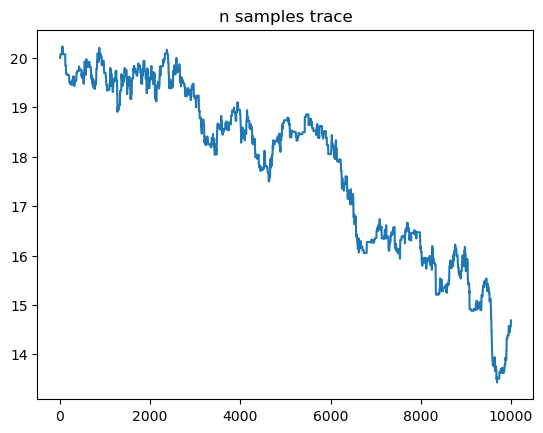

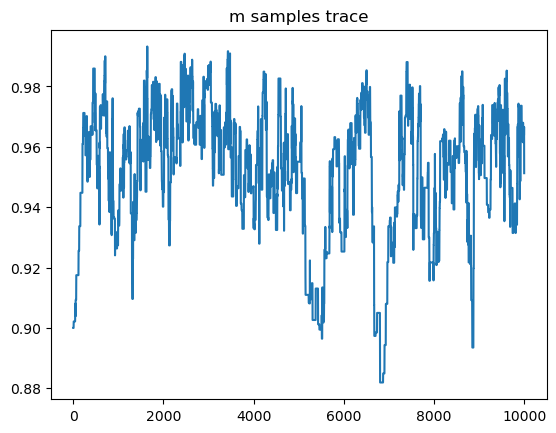

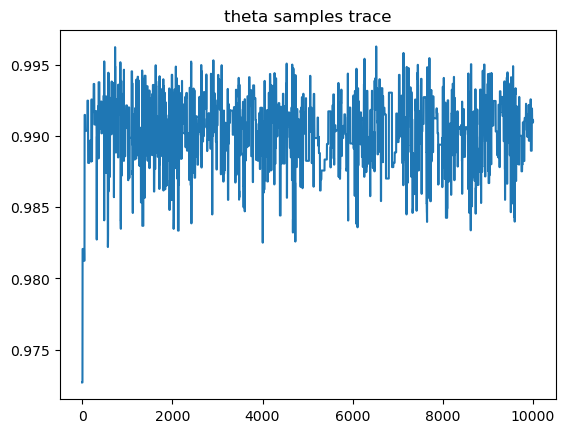

In [81]:
x = np.arange(0, num_iterations, 1)
plt.plot(x, n_samples)
plt.title("n samples trace")
plt.show()

plt.plot(x, m_samples)
plt.title("m samples trace")
plt.show()

plt.plot(x, theta_samples)
plt.title("theta samples trace")
plt.show()

### 1.4.2 Histogram
Plot a histogram of the MCMC samples.

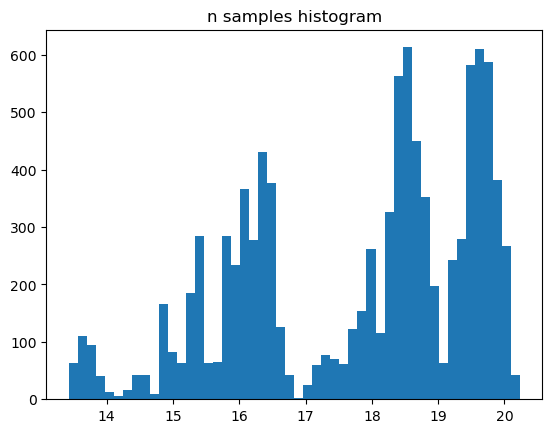

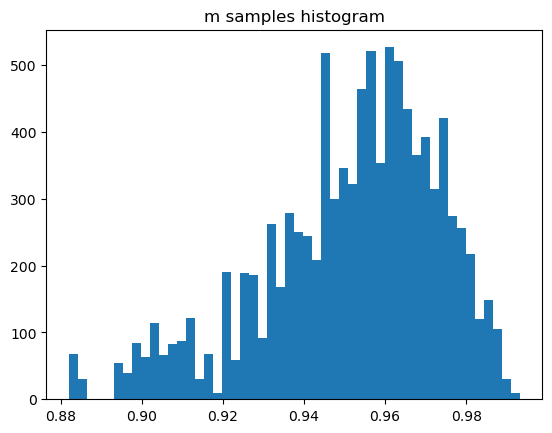

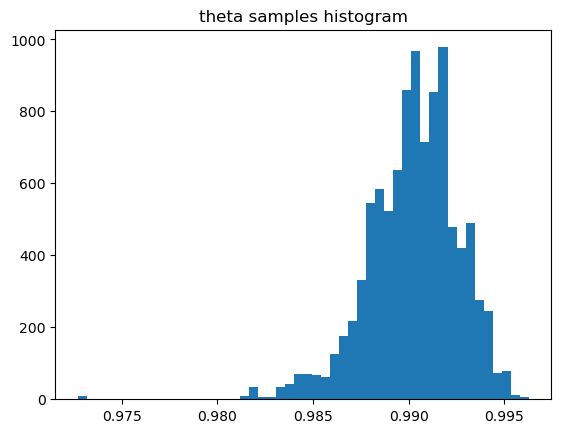

In [82]:
plt.hist(n_samples, bins=50)
plt.title("n samples histogram")
plt.show()

plt.hist(m_samples, bins=50)
plt.title("m samples histogram")
plt.show()

plt.hist(theta_samples, bins=50)
plt.title("theta samples histogram")
plt.show()

### 1.4.3 Autocorrelation

Samples from MCMC algorithms are ususally autocorrelated, due partly to the inherent Markovian dependence structure. For now, we will study individual variables within a model. Plot the autocorrelation for the three inferred variables using $plt.acorr$ with parameter $maxlags$. 

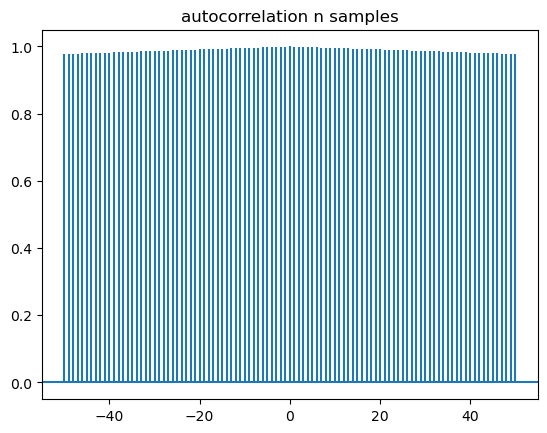

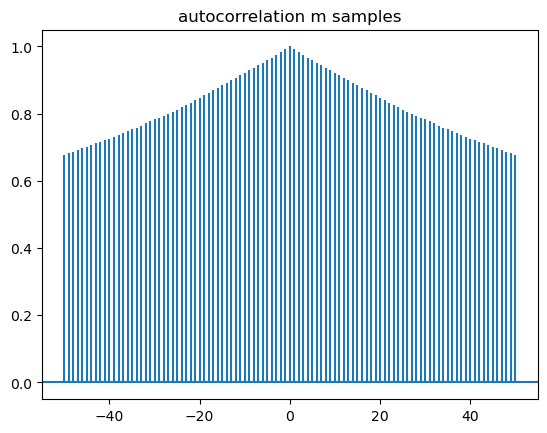

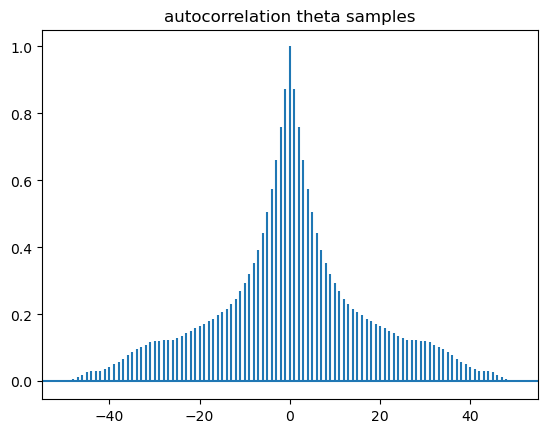

In [93]:
def plot_autocorrelation(samples, max_lags=50, title=None):
    if title:
        plt.title(title)
    plt.acorr(samples - np.mean(samples), maxlags = max_lags)
    plt.show()
    
plot_autocorrelation(n_samples, title = "autocorrelation n samples")
plot_autocorrelation(m_samples, title = "autocorrelation m samples")
plot_autocorrelation(theta_samples, title = "autocorrelation theta samples")

## HW 

After this lab, write an e-mail to your TA with "[SAD2] Lab9" as a title with:
- The diagnostics plots (trace, histogram, and autocorrelation) for $\theta$ (if you want with thinning out/burn in applied) and your comment on it - is it safe to infer from this chain? 
- What has the model learned about chocolate? Compare prior and posteriors on $m$, $n$.
- Finally, explain the the difference between Metropolis Hastings algorithm and Gibbs sampling.

